In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers, callbacks
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Flatten images and normalize to [0, 1]
x_train = x_train.reshape(-1, 784).astype("float32") / 255.0
x_test = x_test.reshape(-1, 784).astype("float32") / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
model1 = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dense(10, activation='softmax')
])

model1.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

# Train model 1
history1 = model1.fit(x_train, y_train, epochs=20, batch_size=128,
                      validation_split=0.2, verbose=1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.8209 - loss: 0.6729 - val_accuracy: 0.9315 - val_loss: 0.2301
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9416 - loss: 0.2057 - val_accuracy: 0.9522 - val_loss: 0.1645
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9582 - loss: 0.1435 - val_accuracy: 0.9622 - val_loss: 0.1308
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9679 - loss: 0.1137 - val_accuracy: 0.9650 - val_loss: 0.1161
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9752 - loss: 0.0873 - val_accuracy: 0.9657 - val_loss: 0.1099
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9784 - loss: 0.0755 - val_accuracy: 0.9707 - val_loss: 0.0961
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9833 - loss: 0.0595 - val_accuracy: 0.9697 - val_loss: 0.0954
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9869 - loss: 0.0491 - val_accuracy: 

In [4]:
lr_scheduler = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                                           patience=2, verbose=1)
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=5,
                                         restore_best_weights=True)

# Model 2: Regularization
model2 = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,),
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model2.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

# Train model 2
history2 = model2.fit(x_train, y_train, epochs=20, batch_size=128,
                      validation_split=0.2, verbose=1,
                      callbacks=[lr_scheduler, early_stopping])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.7253 - loss: 1.0315 - val_accuracy: 0.9334 - val_loss: 0.3599 - learning_rate: 0.0010
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9052 - loss: 0.4415 - val_accuracy: 0.9485 - val_loss: 0.2886 - learning_rate: 0.0010
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9236 - loss: 0.3639 - val_accuracy: 0.9553 - val_loss: 0.2581 - learning_rate: 0.0010
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9317 - loss: 0.3288 - val_accuracy: 0.9593 - val_loss: 0.2317 - learning_rate: 0.0010
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9340 - loss: 0.3133 - val_accuracy: 0.9616 - val_loss: 0.2231 - learning_rate: 0.0010
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9387 - loss: 0.2955 - val_accuracy: 0.9628 - val_loss: 0.2133 - learning_rate: 0.0010
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9434 - loss: 0.2759 -

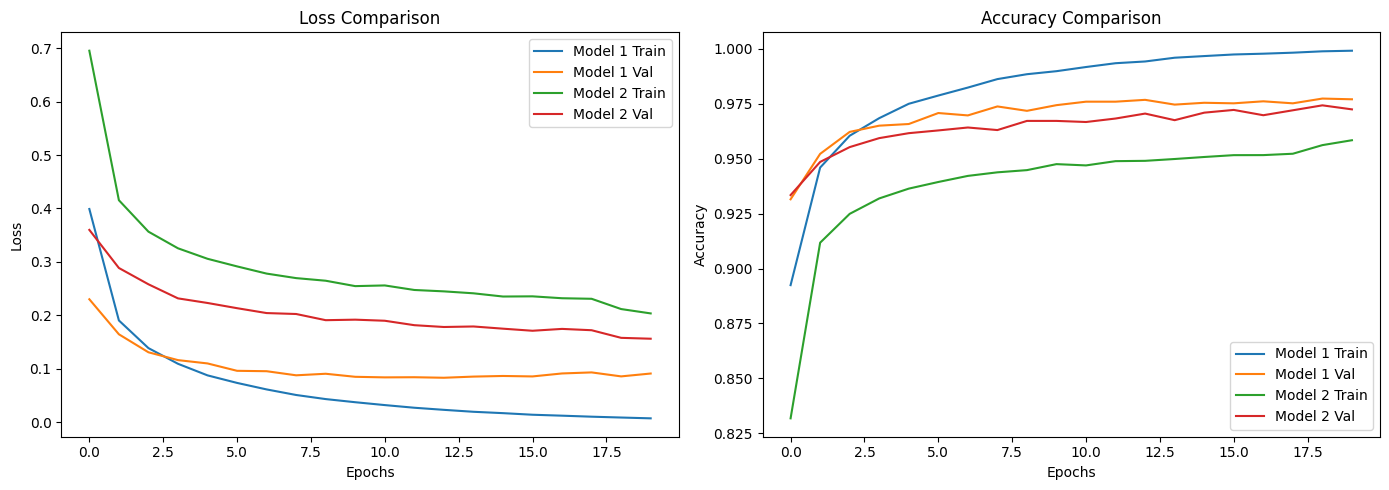

In [5]:
# Extract training history
loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']
acc1 = history1.history['accuracy']
val_acc1 = history1.history['val_accuracy']

loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']
acc2 = history2.history['accuracy']
val_acc2 = history2.history['val_accuracy']

epochs = range(len(loss1))  # Assume both histories are of equal length

# Create side-by-side plots
plt.figure(figsize=(14, 5))

# Loss comparison
plt.subplot(1, 2, 1)
plt.plot(epochs, loss1, label='Model 1 Train')
plt.plot(epochs, val_loss1, label='Model 1 Val')
plt.plot(epochs, loss2, label='Model 2 Train')
plt.plot(epochs, val_loss2, label='Model 2 Val')
plt.title('Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy comparison
plt.subplot(1, 2, 2)
plt.plot(epochs, acc1, label='Model 1 Train')
plt.plot(epochs, val_acc1, label='Model 1 Val')
plt.plot(epochs, acc2, label='Model 2 Train')
plt.plot(epochs, val_acc2, label='Model 2 Val')
plt.title('Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [7]:
# Evaluate Model 1
test_loss1, test_acc1 = model1.evaluate(x_test, y_test, verbose=0)
print(f"Model 1 (No Regularization) - Test Loss: {test_loss1:.4f}, Test Accuracy: {test_acc1:.4f}")

# Evaluate Model 2
test_loss2, test_acc2 = model2.evaluate(x_test, y_test, verbose=0)
print(f"Model 2 (With Regularization) - Test Loss: {test_loss2:.4f}, Test Accuracy: {test_acc2:.4f}")

Model 1 (No Regularization) - Test Loss: 0.0807, Test Accuracy: 0.9767
Model 2 (With Regularization) - Test Loss: 0.1537, Test Accuracy: 0.9731
